<a href="https://colab.research.google.com/github/megha-velak/DataRes_Serial_Killers/blob/main/Homicide_Perpetrator_and_Victim_Counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import re
plt.style.use('tableau-colorblind10')

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download murderaccountability/homicide-reports

100% 9.83M/9.83M [00:00<00:00, 16.0MB/s]
100% 9.83M/9.83M [00:00<00:00, 11.3MB/s]


In [4]:
! unzip homicide-reports.zip


Archive:  homicide-reports.zip
  inflating: database.csv            


In [5]:
df = pd.read_csv('database.csv')

<ipython-input-5-14711dd142c8>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('database.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [7]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [8]:
df=df[(df['Crime Type']!='Manslaughter by Negligence')]

In [9]:
print(df['Relationship'].unique())

['Acquaintance' 'Unknown' 'Wife' 'Stranger' 'Girlfriend' 'Ex-Husband'
 'Brother' 'Stepdaughter' 'Husband' 'Friend' 'Family' 'Neighbor' 'Father'
 'In-Law' 'Son' 'Ex-Wife' 'Boyfriend' 'Mother' 'Sister'
 'Common-Law Husband' 'Common-Law Wife' 'Stepfather' 'Stepson'
 'Stepmother' 'Daughter' 'Boyfriend/Girlfriend' 'Employer' 'Employee']


In [10]:
m = {
    "Family/Relatives": ['Wife','Girlfriend','Ex-Husband','Brother','Stepdaughter','Husband','Family','Father','In-Law','Son','Ex-Wife','Boyfriend','Mother','Sister','Common-Law Husband','Common-Law Wife','Stepfather','Stepson','Stepmother','Daughter'],
    "Acquaintances/Friends": ['Acquaintance','Friend'],
    "Stranger/Unknown": ['Unknown', 'Stranger'],
    "Etc.": ['Employer','Employee','Neighbor']
   }
m2 = {v: k for k,vv in m.items() for v in vv}
df['More Focused Relationship'] = df.Relationship.map(m2).astype('category')

In [11]:
print(df['More Focused Relationship'].describe())
print(df['More Focused Relationship'].info())
print(df['More Focused Relationship'].unique())

count               627965
unique                   4
top       Stranger/Unknown
freq                366846
Name: More Focused Relationship, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 629338 entries, 0 to 638453
Series name: More Focused Relationship
Non-Null Count   Dtype   
--------------   -----   
627965 non-null  category
dtypes: category(1)
memory usage: 5.4 MB
None
['Acquaintances/Friends', 'Stranger/Unknown', 'Family/Relatives', 'Etc.', NaN]
Categories (4, object): ['Acquaintances/Friends', 'Etc.', 'Family/Relatives', 'Stranger/Unknown']


           Record ID           Year       Incident     Victim Age  \
count  629338.000000  629338.000000  629338.000000  629338.000000   
mean   318936.332969    1995.784515      22.332880      35.171329   
std    184213.482319       9.920545      89.842792      41.706121   
min         1.000000    1980.000000       0.000000       0.000000   
25%    159428.250000    1987.000000       1.000000      22.000000   
50%    318897.500000    1995.000000       2.000000      30.000000   
75%    478405.500000    2004.000000      10.000000      42.000000   
max    638454.000000    2014.000000     999.000000     998.000000   

        Victim Count  Perpetrator Count  
count  629338.000000      629338.000000  
mean        0.123937           0.186297  
std         0.538365           0.586794  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000           0.000000  
max        10.000000          10.000000  


<Axes: >

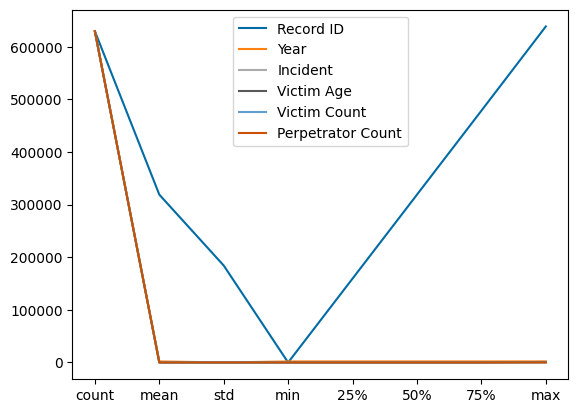

In [12]:
print(df.describe())
df.describe().plot()

In [13]:
homicide_describe = df.describe()
type(homicide_describe)

pandas.core.frame.DataFrame

In [14]:
homicide_describe

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,629338.000000,629338.000000,629338.000000,629338.000000,629338.000000,629338.000000
mean,318936.332969,1995.784515,22.332880,35.171329,0.123937,0.186297
std,184213.482319,9.920545,89.842792,41.706121,0.538365,0.586794
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159428.250000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,318897.500000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478405.500000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [15]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,More Focused Relationship
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,Acquaintances/Friends
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Acquaintances/Friends
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,Stranger/Unknown
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Acquaintances/Friends
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,Stranger/Unknown


In [16]:
df['Victim Count'].astype('float64')
df['Perpetrator Count'].astype('float64')
df['Victim Count'].astype(int)
df['Perpetrator Count'].astype(int)
df['Incident'].astype(int)

0         1
1         1
2         2
3         1
4         2
         ..
638449    1
638450    1
638451    1
638452    1
638453    1
Name: Incident, Length: 629338, dtype: int64

In [ ]:
sns.kdeplot(
  data=df,
  x='Perpetrator Count',
  common_norm=False,
  common_grid=True,
  cumulative=True,
  color='orange'
)

sns.kdeplot(
  data=df,
  x="Victim Count",
  common_norm=False,
  common_grid=True,
  cumulative=True,
)
plt.legend(labels=['Perpetrator Count', 'Victim Count'])


In [ ]:
plt.plot('Victim Count', 'Perpetrator Count',data=df)

Text(0.5, 1.0, 'Victim Count vs. Perpetrator Count')

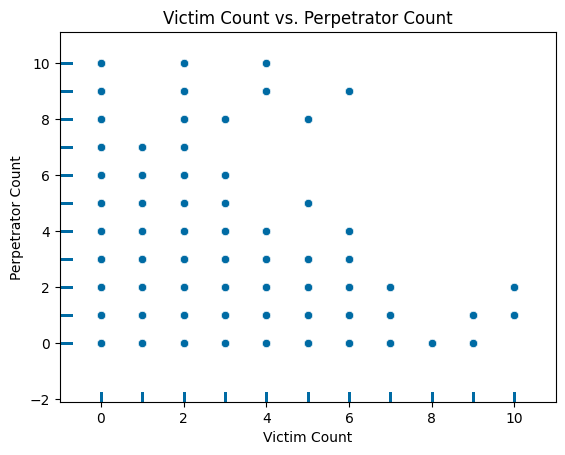

In [19]:
sns.scatterplot(data=df, x="Victim Count", y="Perpetrator Count")
sns.rugplot(data=df, x="Victim Count", y="Perpetrator Count")
plt.xlabel("Victim Count")
plt.ylabel("Perpetrator Count")
plt.title("Victim Count vs. Perpetrator Count")
#general trend: as victim perpetrator count decreases, victim count increases

In [20]:
df.Incident.sum()

14054930

In [21]:
import math
df2 = pd.DataFrame()
df2["Relationship"] = df['Relationship'].unique()
df2["All Perpetrators"] = df.groupby('Relationship')['Incident']
labels = [x[0] for x in df2["All Perpetrators"]]
counts = [np.array(x[1]*(100/14054930)).sum() for x in df2["All Perpetrators"]]
print(counts)

[6.093107543047173, 0.3430468881737582, 0.08764896018692372, 0.5337557711066508, 0.17003997885439487, 0.20405651255466944, 1.078931022779907, 0.009612285511204965, 0.023465075955554388, 0.01701182432071878, 0.04328018709449283, 1.5587484249299002, 0.641184267726698, 1.7748149581677033, 0.6498502660632248, 0.7810568960499981, 0.10453983050787163, 0.631685821274101, 0.22043510711188172, 0.13348341115893142, 1.507129526792378, 0.017246617379097585, 0.039196210866934235, 0.003891872816157747, 0.038363762750863936, 8.066728187191256, 71.65764610709552, 3.570042682532036]


Text(0.5, 0, 'Incident Percentages (%)')

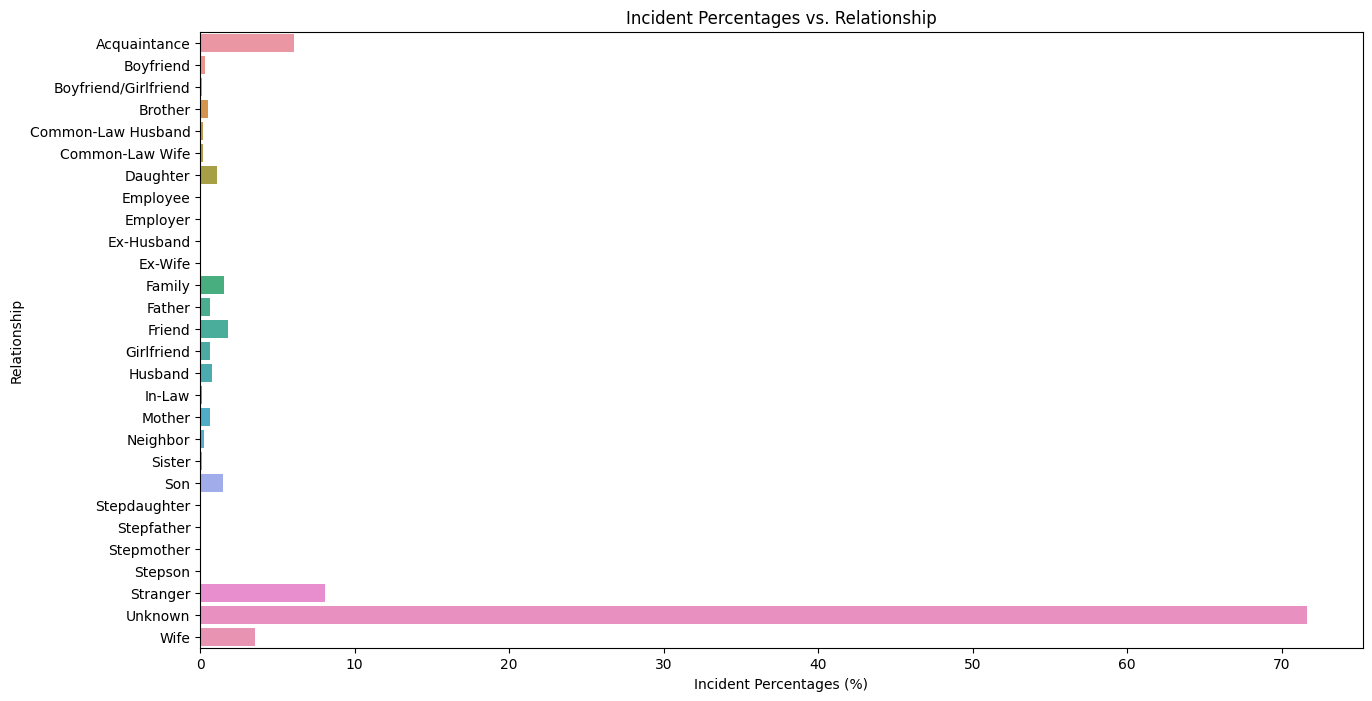

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x=counts, y=labels, errorbar=None)
plt.title("Incident Percentages vs. Relationship")
plt.ylabel("Relationship")
plt.xlabel("Incident Percentages (%)")

In [23]:
df['Year Month'] = df['Year'].astype(str) + ' ' + df['Month']

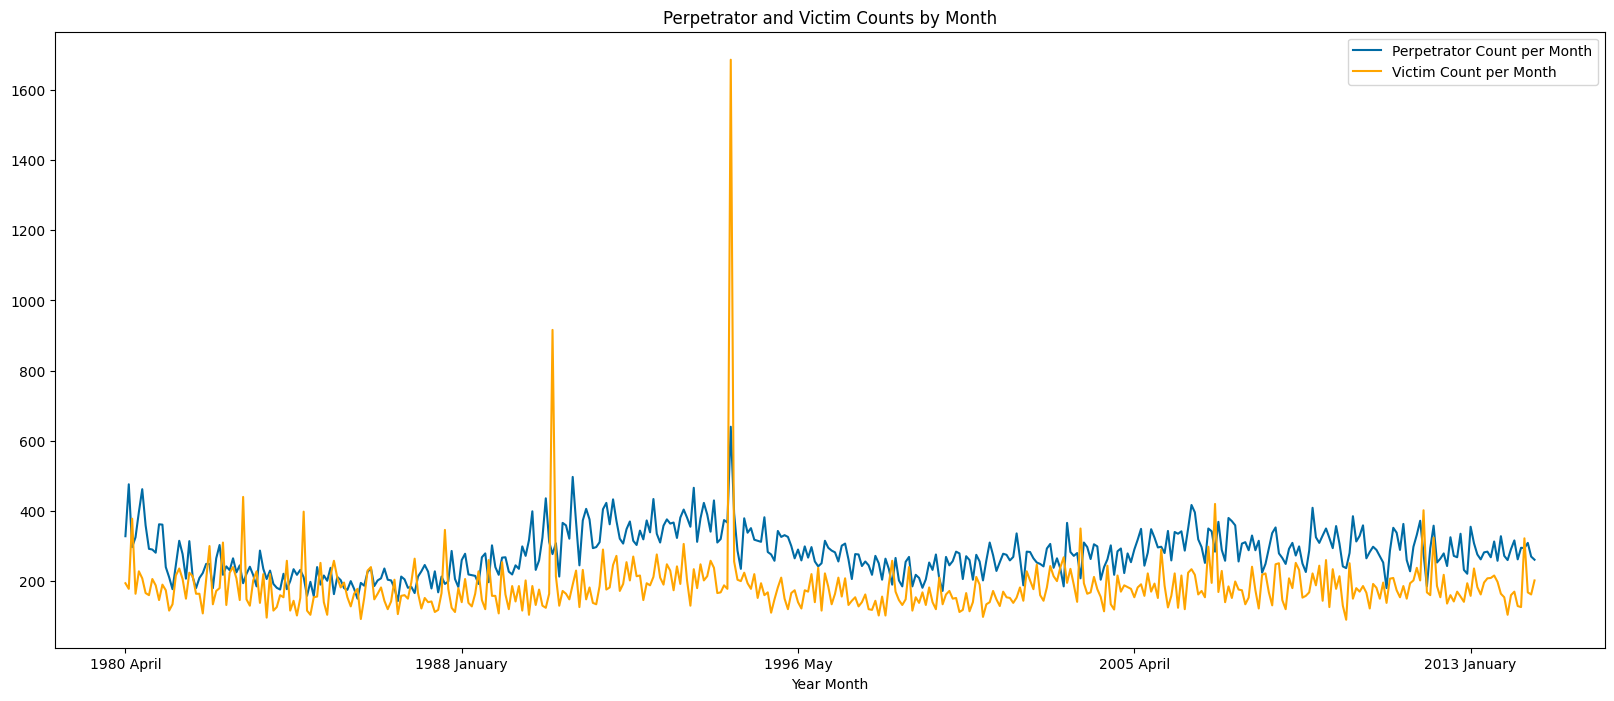

In [24]:
perpByYear = df.groupby('Year Month')['Perpetrator Count'].sum()
victimByYear = df.groupby('Year Month')['Victim Count'].sum()
plt.figure(figsize=(20,8))
perpByYear.plot(label = 'Perpetrator Count per Month')
victimByYear.plot(label= 'Victim Count per Month', c = 'orange')
plt.legend(loc='best')
plt.title('Perpetrator and Victim Counts by Month')
plt.show()

In [28]:
print(perpByYear.at["1990 March"])
print(victimByYear.at["1990 March"])
print(perpByYear.at["1995 April"])
print(victimByYear.at["1995 April"])

277
916
640
1686
